<a href="https://colab.research.google.com/github/RazorZ7X/Challenge_TelecomX_Alura/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [33]:
import pandas as pd

In [34]:
df = pd.read_json('https://raw.githubusercontent.com/RazorZ7X/Challenge_TelecomX_Alura/refs/heads/main/TelecomX_Data.json')

In [35]:
df.tail()

,customerID,Churn,customer,phone,internet,account
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."
7266,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformación

✅ Explorar las columnas del dataset y verificar sus tipos de datos.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


✅ Consultar el diccionario para comprender mejor el significado de las variables.

In [37]:
columns_to_flatten = ['customer', 'phone', 'internet', 'account']

for col in columns_to_flatten:
    df = pd.concat([df.drop(columns=[col]), df[col].apply(pd.Series)], axis=1)

print("DataFrame después de aplanar las columnas:")
df.head()

DataFrame después de aplanar las columnas:


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


In [38]:
df = pd.concat([df.drop(columns=['Charges']), df['Charges'].apply(pd.Series)], axis=1)
print("DataFrame después de aplanar la columna 'Charges':")
df.head()

DataFrame después de aplanar la columna 'Charges':


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [39]:
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')
print("Number of NaN values in 'Total' column after conversion:")
print(df['Total'].isnull().sum())

Number of NaN values in 'Total' column after conversion:
11


In [40]:
df['Total'] = df['Total'].fillna(0)
print("Number of NaN values in 'Total' column after filling:")
print(df['Total'].isnull().sum())

Number of NaN values in 'Total' column after filling:
0


In [41]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Monthly             0
Total               0
dtype: int64


In [42]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [43]:
for column in df.select_dtypes(include='object').columns:
    print(f"Unique values for column '{column}':")
    print(df[column].unique())
    print("\n" + "-"*50 + "\n")

Unique values for column 'customerID':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

--------------------------------------------------

Unique values for column 'Churn':
['No' 'Yes' '']

--------------------------------------------------

Unique values for column 'gender':
['Female' 'Male']

--------------------------------------------------

Unique values for column 'Partner':
['Yes' 'No']

--------------------------------------------------

Unique values for column 'Dependents':
['Yes' 'No']

--------------------------------------------------

Unique values for column 'PhoneService':
['Yes' 'No']

--------------------------------------------------

Unique values for column 'MultipleLines':
['No' 'Yes' 'No phone service']

--------------------------------------------------

Unique values for column 'InternetService':
['DSL' 'Fiber optic' 'No']

--------------------------------------------------

Unique values for column 'OnlineSecurity':
['No' 

In [44]:
df['Churn'] = df['Churn'].replace('', 'No')
print("Unique values for 'Churn' column after correction:")
print(df['Churn'].unique())

Unique values for 'Churn' column after correction:
['No' 'Yes']


In [45]:
print('Data types of all columns:')
print(df.dtypes)

Data types of all columns:
customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Monthly             float64
Total               float64
dtype: object


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [48]:
df['Cuentas_Diarias'] = df['Monthly'] / 30

print("DataFrame con la nueva columna 'Cuentas_Diarias':")
df.head()

DataFrame con la nueva columna 'Cuentas_Diarias':


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


#📊 Carga y análisis

In [51]:
numerical_cols = ['tenure', 'Monthly', 'Total', 'Cuentas_Diarias']
descriptive_stats = df[numerical_cols].describe()
print("Descriptive statistics for numerical columns:")
print(descriptive_stats)

Descriptive statistics for numerical columns:
            tenure      Monthly        Total  Cuentas_Diarias
count  7267.000000  7267.000000  7267.000000      7267.000000
mean     32.346498    64.720098  2277.182035         2.157337
std      24.571773    30.129572  2268.648587         1.004319
min       0.000000    18.250000     0.000000         0.608333
25%       9.000000    35.425000   396.200000         1.180833
50%      29.000000    70.300000  1389.200000         2.343333
75%      55.000000    89.875000  3778.525000         2.995833
max      72.000000   118.750000  8684.800000         3.958333


In [52]:
categorical_cols = df.select_dtypes(include='object').columns
print("Categorical columns identified:")
for col in categorical_cols:
    print(f"Unique values and their counts for column '{col}':")
    print(df[col].value_counts())
    print("\n" + "-"*50 + "\n")

Categorical columns identified:
Unique values and their counts for column 'customerID':
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

--------------------------------------------------

Unique values and their counts for column 'Churn':
Churn
No     5398
Yes    1869
Name: count, dtype: int64

--------------------------------------------------

Unique values and their counts for column 'gender':
gender
Male      3675
Female    3592
Name: count, dtype: int64

--------------------------------------------------

Unique values and their counts for column 'Partner':
Partner
No     3749
Yes    3518
Name: count, dtype: int64

--------------------------------------------------

Unique values and their counts for column 'Dependents':
Dependents
No     5086
Yes    2181
Name: count, dtype: int64

----------------------

/tmp/ipython-input-1797135686.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='viridis')


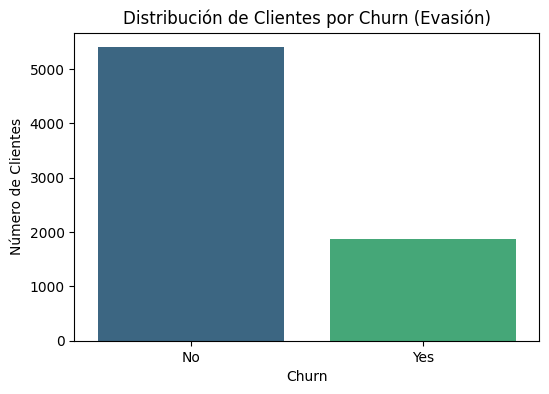

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='viridis')
plt.title('Distribución de Clientes por Churn (Evasión)')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.show()

In [54]:
gender_churn_counts = df.groupby(['gender', 'Churn']).size().unstack(fill_value=0)

print("Churn counts by gender:")
print(gender_churn_counts)

Churn counts by gender:
Churn     No  Yes
gender           
Female  2653  939
Male    2745  930


Churn rates by gender:
gender
Female    0.261414
Male      0.253061
dtype: float64


/tmp/ipython-input-3153259730.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_churn_rates.index, y=gender_churn_rates.values, palette='viridis')


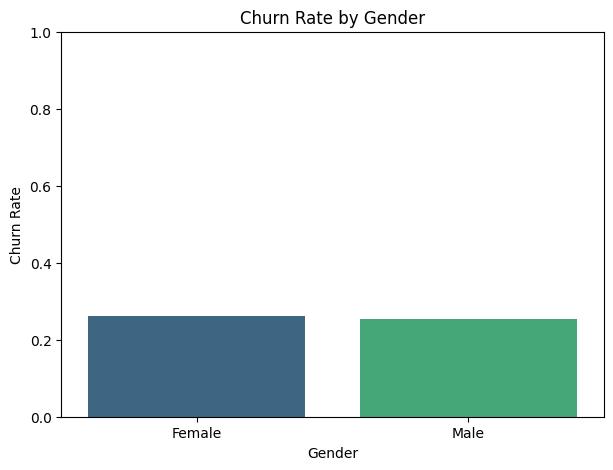

In [55]:
gender_churn_rates = gender_churn_counts['Yes'] / (gender_churn_counts['No'] + gender_churn_counts['Yes'])

print("Churn rates by gender:")
print(gender_churn_rates)

plt.figure(figsize=(7, 5))
sns.barplot(x=gender_churn_rates.index, y=gender_churn_rates.values, palette='viridis')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.ylim(0, 1) # Churn rate is between 0 and 1
plt.show()

Churn rates by gender:
gender
Female    0.261414
Male      0.253061
dtype: float64


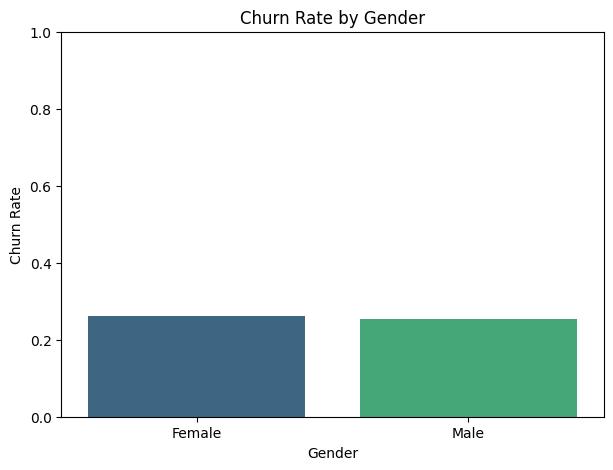

In [56]:
gender_churn_rates = gender_churn_counts['Yes'] / (gender_churn_counts['No'] + gender_churn_counts['Yes'])

print("Churn rates by gender:")
print(gender_churn_rates)

plt.figure(figsize=(7, 5))
sns.barplot(x=gender_churn_rates.index, y=gender_churn_rates.values, hue=gender_churn_rates.index, palette='viridis', legend=False)
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.ylim(0, 1) # Churn rate is between 0 and 1
plt.show()

Churn counts by contract type:
Churn             No   Yes
Contract                  
Month-to-month  2350  1655
One year        1353   166
Two year        1695    48

Churn rates by contract type:
Contract
Month-to-month    0.413233
One year          0.109282
Two year          0.027539
dtype: float64


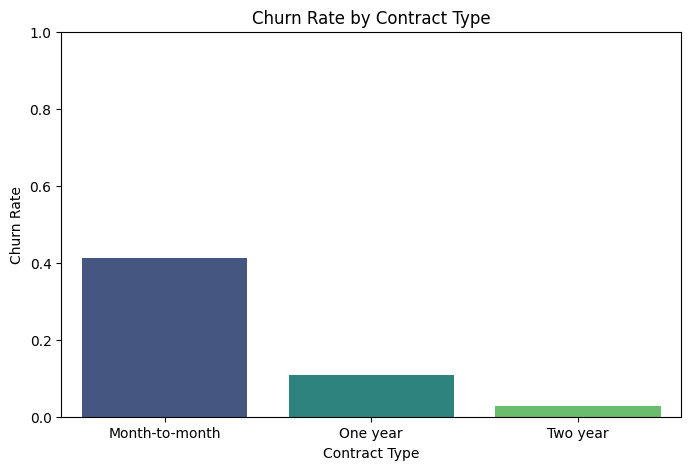

In [57]:
contract_churn_counts = df.groupby(['Contract', 'Churn']).size().unstack(fill_value=0)

print("Churn counts by contract type:")
print(contract_churn_counts)

contract_churn_rates = contract_churn_counts['Yes'] / (contract_churn_counts['No'] + contract_churn_counts['Yes'])

print("\nChurn rates by contract type:")
print(contract_churn_rates)

plt.figure(figsize=(8, 5))
sns.barplot(x=contract_churn_rates.index, y=contract_churn_rates.values, hue=contract_churn_rates.index, palette='viridis', legend=False)
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()

Churn counts by payment method:
Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1331   258
Credit card (automatic)    1336   232
Electronic check           1374  1071
Mailed check               1357   308

Churn rates by payment method:
PaymentMethod
Bank transfer (automatic)    0.162366
Credit card (automatic)      0.147959
Electronic check             0.438037
Mailed check                 0.184985
dtype: float64


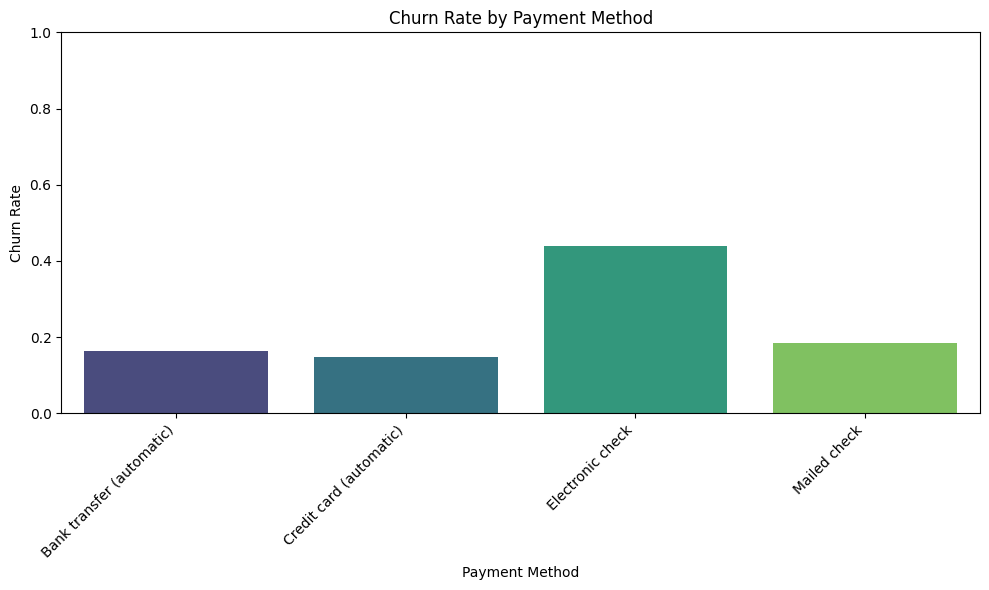

In [58]:
payment_method_churn_counts = df.groupby(['PaymentMethod', 'Churn']).size().unstack(fill_value=0)

print("Churn counts by payment method:")
print(payment_method_churn_counts)

payment_method_churn_rates = payment_method_churn_counts['Yes'] / (payment_method_churn_counts['No'] + payment_method_churn_counts['Yes'])

print("\nChurn rates by payment method:")
print(payment_method_churn_rates)

plt.figure(figsize=(10, 6))
sns.barplot(x=payment_method_churn_rates.index, y=payment_method_churn_rates.values, hue=payment_method_churn_rates.index, palette='viridis', legend=False)
plt.title('Churn Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate')
plt.ylim(0, 1) # Churn rate is between 0 and 1
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Churn counts by internet service type:
Churn              No   Yes
InternetService            
DSL              2029   459
Fiber optic      1901  1297
No               1468   113

Churn rates by internet service type:
InternetService
DSL            0.184486
Fiber optic    0.405566
No             0.071474
dtype: float64


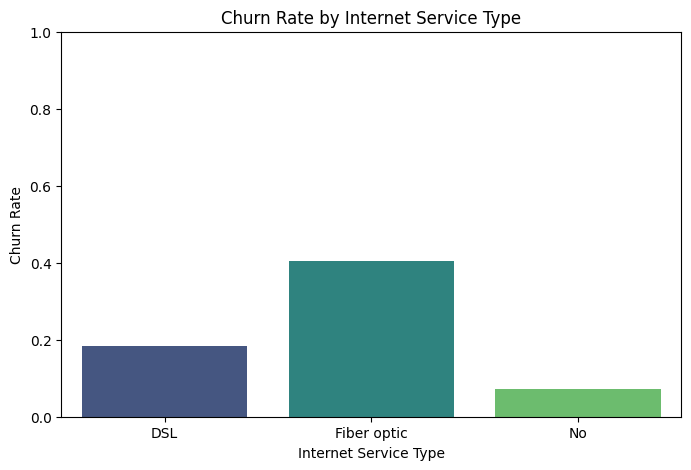

In [59]:
internet_service_churn_counts = df.groupby(['InternetService', 'Churn']).size().unstack(fill_value=0)

print("Churn counts by internet service type:")
print(internet_service_churn_counts)

internet_service_churn_rates = internet_service_churn_counts['Yes'] / (internet_service_churn_counts['No'] + internet_service_churn_counts['Yes'])

print("\nChurn rates by internet service type:")
print(internet_service_churn_rates)

plt.figure(figsize=(8, 5))
sns.barplot(x=internet_service_churn_rates.index, y=internet_service_churn_rates.values, hue=internet_service_churn_rates.index, palette='viridis', legend=False)
plt.title('Churn Rate by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Churn Rate')
plt.ylim(0, 1) # Churn rate is between 0 and 1
plt.show()

Churn counts by Partner:
Churn      No   Yes
Partner            
No       2549  1200
Yes      2849   669

Churn rates by Partner:
Partner
No     0.320085
Yes    0.190165
dtype: float64


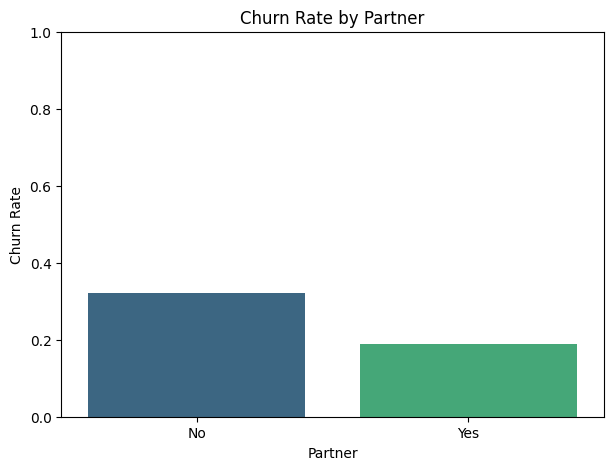

In [60]:
partner_churn_counts = df.groupby(['Partner', 'Churn']).size().unstack(fill_value=0)

print("Churn counts by Partner:")
print(partner_churn_counts)

partner_churn_rates = partner_churn_counts['Yes'] / (partner_churn_counts['No'] + partner_churn_counts['Yes'])

print("\nChurn rates by Partner:")
print(partner_churn_rates)

plt.figure(figsize=(7, 5))
sns.barplot(x=partner_churn_rates.index, y=partner_churn_rates.values, hue=partner_churn_rates.index, palette='viridis', legend=False)
plt.title('Churn Rate by Partner')
plt.xlabel('Partner')
plt.ylabel('Churn Rate')
plt.ylim(0, 1) # Churn rate is between 0 and 1
plt.show()

Churn counts by Dependents:
Churn         No   Yes
Dependents            
No          3543  1543
Yes         1855   326

Churn rates by Dependents:
Dependents
No     0.303382
Yes    0.149473
dtype: float64


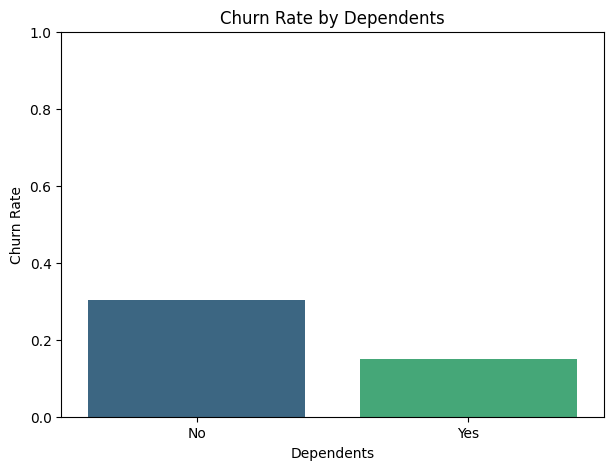

In [61]:
dependents_churn_counts = df.groupby(['Dependents', 'Churn']).size().unstack(fill_value=0)

print("Churn counts by Dependents:")
print(dependents_churn_counts)

dependents_churn_rates = dependents_churn_counts['Yes'] / (dependents_churn_counts['No'] + dependents_churn_counts['Yes'])

print("\nChurn rates by Dependents:")
print(dependents_churn_rates)

plt.figure(figsize=(7, 5))
sns.barplot(x=dependents_churn_rates.index, y=dependents_churn_rates.values, hue=dependents_churn_rates.index, palette='viridis', legend=False)
plt.title('Churn Rate by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Churn Rate')
plt.ylim(0, 1) # Churn rate is between 0 and 1
plt.show()

Churn counts by OnlineSecurity:
Churn                  No   Yes
OnlineSecurity                 
No                   2147  1461
No internet service  1468   113
Yes                  1783   295

Churn rates by OnlineSecurity:
OnlineSecurity
No                     0.404933
No internet service    0.071474
Yes                    0.141963
dtype: float64


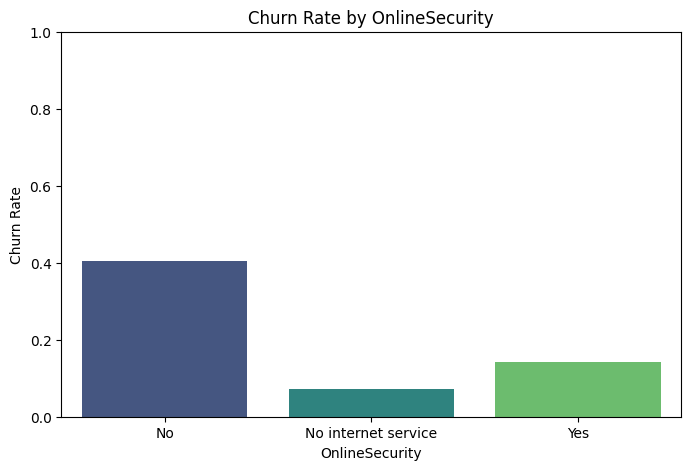

In [62]:
online_security_churn_counts = df.groupby(['OnlineSecurity', 'Churn']).size().unstack(fill_value=0)

print("Churn counts by OnlineSecurity:")
print(online_security_churn_counts)

online_security_churn_rates = online_security_churn_counts['Yes'] / (online_security_churn_counts['No'] + online_security_churn_counts['Yes'])

print("\nChurn rates by OnlineSecurity:")
print(online_security_churn_rates)

plt.figure(figsize=(8, 5))
sns.barplot(x=online_security_churn_rates.index, y=online_security_churn_rates.values, hue=online_security_churn_rates.index, palette='viridis', legend=False)
plt.title('Churn Rate by OnlineSecurity')
plt.xlabel('OnlineSecurity')
plt.ylabel('Churn Rate')
plt.ylim(0, 1) # Churn rate is between 0 and 1
plt.show()

Churn counts by OnlineBackup:
Churn                  No   Yes
OnlineBackup                   
No                   1949  1233
No internet service  1468   113
Yes                  1981   523

Churn rates by OnlineBackup:
OnlineBackup
No                     0.387492
No internet service    0.071474
Yes                    0.208866
dtype: float64


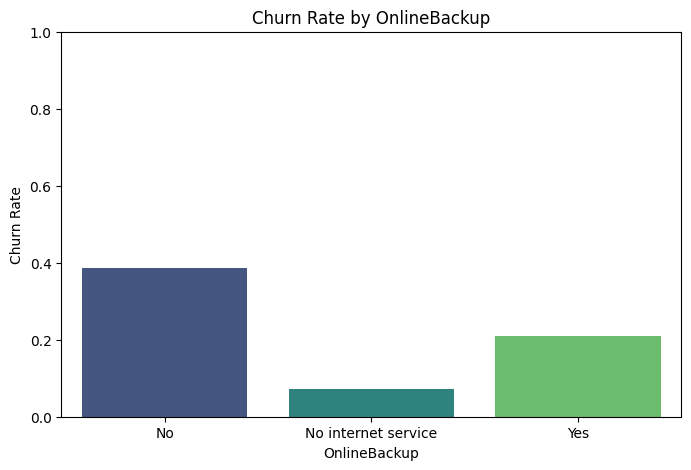

In [63]:
online_backup_churn_counts = df.groupby(['OnlineBackup', 'Churn']).size().unstack(fill_value=0)

print("Churn counts by OnlineBackup:")
print(online_backup_churn_counts)

online_backup_churn_rates = online_backup_churn_counts['Yes'] / (online_backup_churn_counts['No'] + online_backup_churn_counts['Yes'])

print("\nChurn rates by OnlineBackup:")
print(online_backup_churn_rates)

plt.figure(figsize=(8, 5))
sns.barplot(x=online_backup_churn_rates.index, y=online_backup_churn_rates.values, hue=online_backup_churn_rates.index, palette='viridis', legend=False)
plt.title('Churn Rate by OnlineBackup')
plt.xlabel('OnlineBackup')
plt.ylabel('Churn Rate')
plt.ylim(0, 1) # Churn rate is between 0 and 1
plt.show()

Churn counts by DeviceProtection:
Churn                  No   Yes
DeviceProtection               
No                   1984  1211
No internet service  1468   113
Yes                  1946   545

Churn rates by DeviceProtection:
DeviceProtection
No                     0.379030
No internet service    0.071474
Yes                    0.218788
dtype: float64


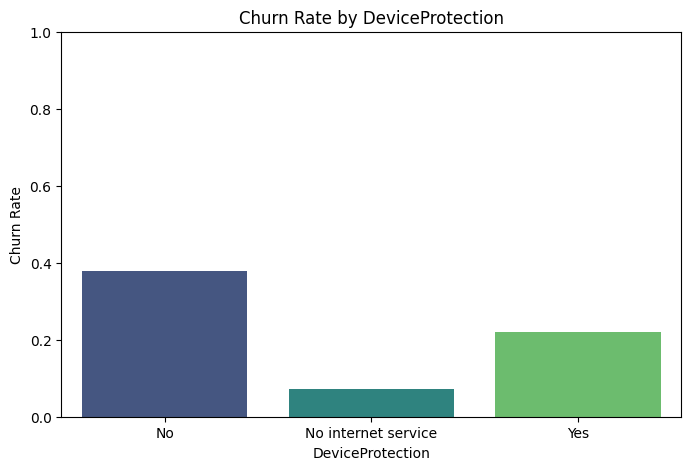

In [72]:
device_protection_churn_counts = df.groupby(['DeviceProtection', 'Churn']).size().unstack(fill_value=0)

print("Churn counts by DeviceProtection:")
print(device_protection_churn_counts)

device_protection_churn_rates = device_protection_churn_counts['Yes'] / (device_protection_churn_counts['No'] + device_protection_churn_counts['Yes'])

print("\nChurn rates by DeviceProtection:")
print(device_protection_churn_rates)

plt.figure(figsize=(8, 5))
sns.barplot(x=device_protection_churn_rates.index, y=device_protection_churn_rates.values, hue=device_protection_churn_rates.index, palette='viridis', legend=False)
plt.title('Churn Rate by DeviceProtection')
plt.xlabel('DeviceProtection')
plt.ylabel('Churn Rate')
plt.ylim(0, 1) # Churn rate is between 0 and 1
plt.show()

Churn counts by DeviceProtection:
Churn                  No   Yes
DeviceProtection               
No                   1984  1211
No internet service  1468   113
Yes                  1946   545

Churn rates by DeviceProtection:
DeviceProtection
No                     0.379030
No internet service    0.071474
Yes                    0.218788
dtype: float64


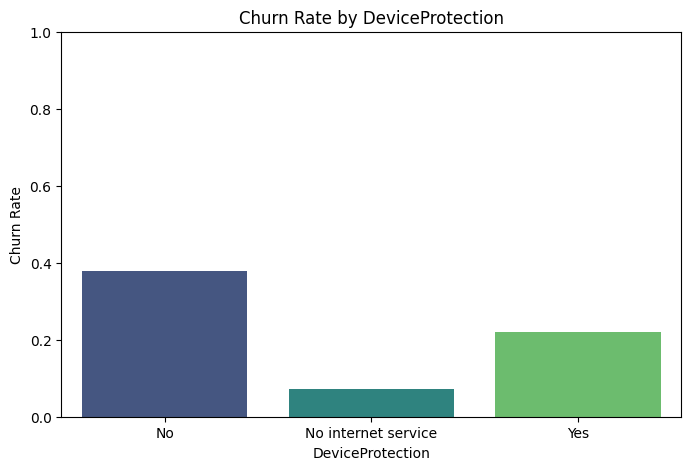

In [65]:
device_protection_churn_counts = df.groupby(['DeviceProtection', 'Churn']).size().unstack(fill_value=0)

print("Churn counts by DeviceProtection:")
print(device_protection_churn_counts)

device_protection_churn_rates = device_protection_churn_counts['Yes'] / (device_protection_churn_counts['No'] + device_protection_churn_counts['Yes'])

print("\nChurn rates by DeviceProtection:")
print(device_protection_churn_rates)

plt.figure(figsize=(8, 5))
sns.barplot(x=device_protection_churn_rates.index, y=device_protection_churn_rates.values, hue=device_protection_churn_rates.index, palette='viridis', legend=False)
plt.title('Churn Rate by DeviceProtection')
plt.xlabel('DeviceProtection')
plt.ylabel('Churn Rate')
plt.ylim(0, 1) # Churn rate is between 0 and 1
plt.show()

Churn counts by TechSupport:
Churn                  No   Yes
TechSupport                    
No                   2136  1446
No internet service  1468   113
Yes                  1794   310

Churn rates by TechSupport:
TechSupport
No                     0.403685
No internet service    0.071474
Yes                    0.147338
dtype: float64


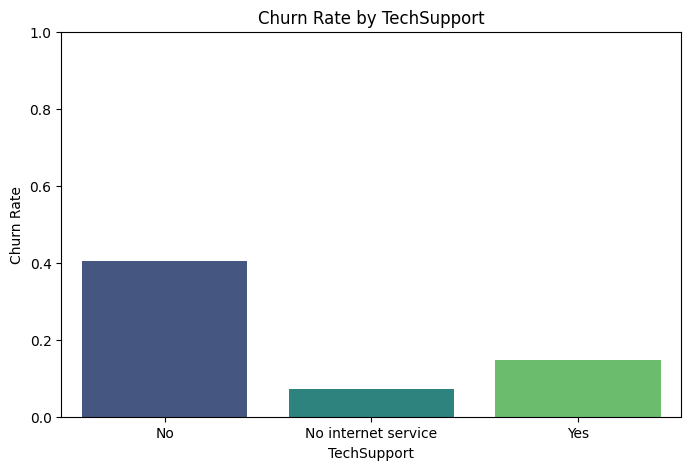

In [66]:
tech_support_churn_counts = df.groupby(['TechSupport', 'Churn']).size().unstack(fill_value=0)

print("Churn counts by TechSupport:")
print(tech_support_churn_counts)

tech_support_churn_rates = tech_support_churn_counts['Yes'] / (tech_support_churn_counts['No'] + tech_support_churn_counts['Yes'])

print("\nChurn rates by TechSupport:")
print(tech_support_churn_rates)

plt.figure(figsize=(8, 5))
sns.barplot(x=tech_support_churn_rates.index, y=tech_support_churn_rates.values, hue=tech_support_churn_rates.index, palette='viridis', legend=False)
plt.title('Churn Rate by TechSupport')
plt.xlabel('TechSupport')
plt.ylabel('Churn Rate')
plt.ylim(0, 1) # Churn rate is between 0 and 1
plt.show()

Churn counts by StreamingTV:
Churn                  No  Yes
StreamingTV                   
No                   1954  942
No internet service  1468  113
Yes                  1976  814

Churn rates by StreamingTV:
StreamingTV
No                     0.325276
No internet service    0.071474
Yes                    0.291756
dtype: float64


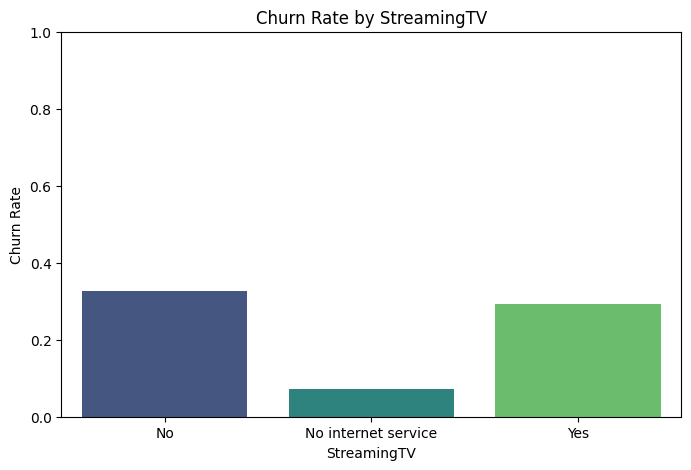

In [67]:
streaming_tv_churn_counts = df.groupby(['StreamingTV', 'Churn']).size().unstack(fill_value=0)

print("Churn counts by StreamingTV:")
print(streaming_tv_churn_counts)

streaming_tv_churn_rates = streaming_tv_churn_counts['Yes'] / (streaming_tv_churn_counts['No'] + streaming_tv_churn_counts['Yes'])

print("\nChurn rates by StreamingTV:")
print(streaming_tv_churn_rates)

plt.figure(figsize=(8, 5))
sns.barplot(x=streaming_tv_churn_rates.index, y=streaming_tv_churn_rates.values, hue=streaming_tv_churn_rates.index, palette='viridis', legend=False)
plt.title('Churn Rate by StreamingTV')
plt.xlabel('StreamingTV')
plt.ylabel('Churn Rate')
plt.ylim(0, 1) # Churn rate is between 0 and 1
plt.show()

Churn counts by StreamingMovies:
Churn                  No  Yes
StreamingMovies               
No                   1932  938
No internet service  1468  113
Yes                  1998  818

Churn rates by StreamingMovies:
StreamingMovies
No                     0.326829
No internet service    0.071474
Yes                    0.290483
dtype: float64


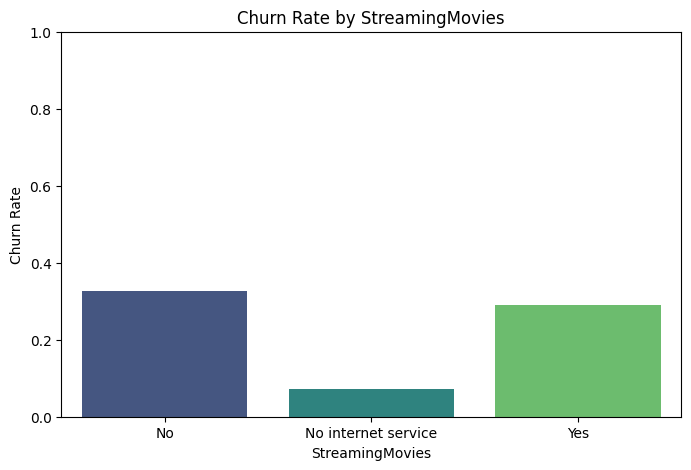

In [68]:
streaming_movies_churn_counts = df.groupby(['StreamingMovies', 'Churn']).size().unstack(fill_value=0)

print("Churn counts by StreamingMovies:")
print(streaming_movies_churn_counts)

streaming_movies_churn_rates = streaming_movies_churn_counts['Yes'] / (streaming_movies_churn_counts['No'] + streaming_movies_churn_counts['Yes'])

print("\nChurn rates by StreamingMovies:")
print(streaming_movies_churn_rates)

plt.figure(figsize=(8, 5))
sns.barplot(x=streaming_movies_churn_rates.index, y=streaming_movies_churn_rates.values, hue=streaming_movies_churn_rates.index, palette='viridis', legend=False)
plt.title('Churn Rate by StreamingMovies')
plt.xlabel('StreamingMovies')
plt.ylabel('Churn Rate')
plt.ylim(0, 1) # Churn rate is between 0 and 1
plt.show()

Churn counts by PhoneService:
Churn           No   Yes
PhoneService            
No             537   170
Yes           4861  1699

Churn rates by PhoneService:
PhoneService
No     0.240453
Yes    0.258994
dtype: float64


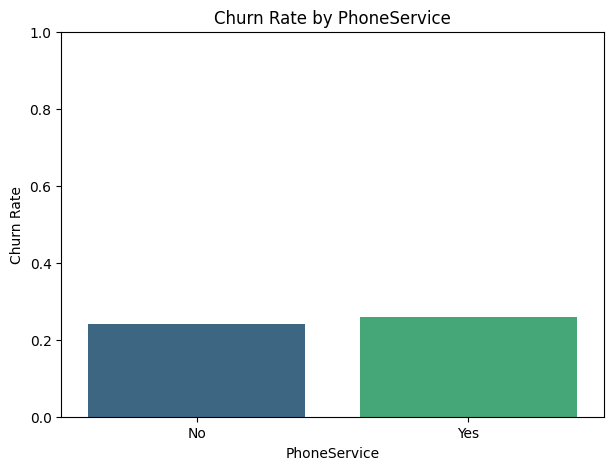

In [69]:
phone_service_churn_counts = df.groupby(['PhoneService', 'Churn']).size().unstack(fill_value=0)

print("Churn counts by PhoneService:")
print(phone_service_churn_counts)

phone_service_churn_rates = phone_service_churn_counts['Yes'] / (phone_service_churn_counts['No'] + phone_service_churn_counts['Yes'])

print("\nChurn rates by PhoneService:")
print(phone_service_churn_rates)

plt.figure(figsize=(7, 5))
sns.barplot(x=phone_service_churn_rates.index, y=phone_service_churn_rates.values, hue=phone_service_churn_rates.index, palette='viridis', legend=False)
plt.title('Churn Rate by PhoneService')
plt.xlabel('PhoneService')
plt.ylabel('Churn Rate')
plt.ylim(0, 1) # Churn rate is between 0 and 1
plt.show()

Churn counts by MultipleLines:
Churn               No  Yes
MultipleLines              
No                2646  849
No phone service   537  170
Yes               2215  850

Churn rates by MultipleLines:
MultipleLines
No                  0.242918
No phone service    0.240453
Yes                 0.277325
dtype: float64


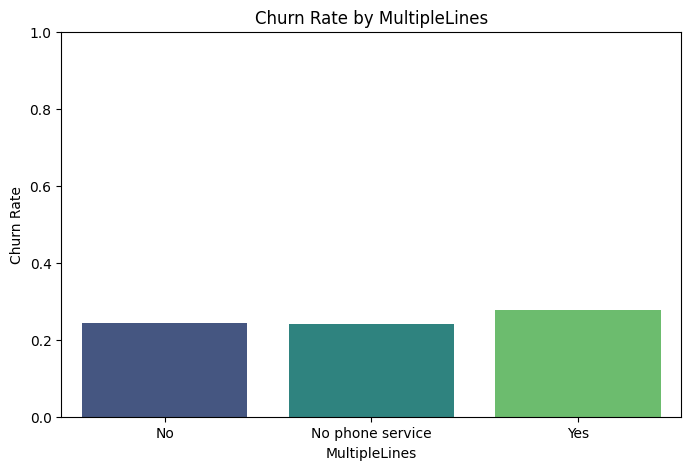

In [70]:
multiple_lines_churn_counts = df.groupby(['MultipleLines', 'Churn']).size().unstack(fill_value=0)

print("Churn counts by MultipleLines:")
print(multiple_lines_churn_counts)

multiple_lines_churn_rates = multiple_lines_churn_counts['Yes'] / (multiple_lines_churn_counts['No'] + multiple_lines_churn_counts['Yes'])

print("\nChurn rates by MultipleLines:")
print(multiple_lines_churn_rates)

plt.figure(figsize=(8, 5))
sns.barplot(x=multiple_lines_churn_rates.index, y=multiple_lines_churn_rates.values, hue=multiple_lines_churn_rates.index, palette='viridis', legend=False)
plt.title('Churn Rate by MultipleLines')
plt.xlabel('MultipleLines')
plt.ylabel('Churn Rate')
plt.ylim(0, 1) # Churn rate is between 0 and 1
plt.show()

Churn counts by PaperlessBilling:
Churn               No   Yes
PaperlessBilling            
No                2487   469
Yes               2911  1400

Churn rates by PaperlessBilling:
PaperlessBilling
No     0.158660
Yes    0.324751
dtype: float64


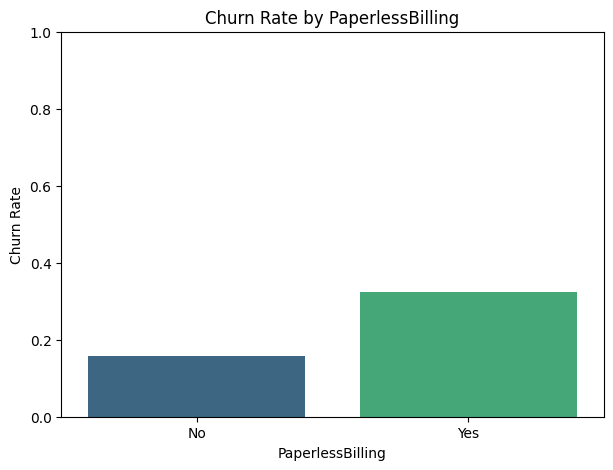

In [71]:
paperless_billing_churn_counts = df.groupby(['PaperlessBilling', 'Churn']).size().unstack(fill_value=0)

print("Churn counts by PaperlessBilling:")
print(paperless_billing_churn_counts)

paperless_billing_churn_rates = paperless_billing_churn_counts['Yes'] / (paperless_billing_churn_counts['No'] + paperless_billing_churn_counts['Yes'])

print("\nChurn rates by PaperlessBilling:")
print(paperless_billing_churn_rates)

plt.figure(figsize=(7, 5))
sns.barplot(x=paperless_billing_churn_rates.index, y=paperless_billing_churn_rates.values, hue=paperless_billing_churn_rates.index, palette='viridis', legend=False)
plt.title('Churn Rate by PaperlessBilling')
plt.xlabel('PaperlessBilling')
plt.ylabel('Churn Rate')
plt.ylim(0, 1) # Churn rate is between 0 and 1
plt.show()

#📄Informe final